# 한글폰트 설치
- 아래 실행후 '런터임 다시 시작' 하면 됩니다.
- 메뉴에서 '런타임' >> '런타임 다시 시작'을 클릭하세요.
- 런타임 다시 시작 후 다시 실행할 필요 없습니다.

In [1]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 로딩
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# Install

In [1]:
!pip install sentencepiece

     |████████████████████████████████| 1.2MB 19.0MB/s 


# Evn

In [2]:
import os
import random
import shutil
import json
import zipfile
import math
import copy
import collections
import re

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sentencepiece as spm
import tensorflow as tf
import tensorflow.keras.backend as K

from tqdm.notebook import tqdm

In [3]:
from sklearn.decomposition import PCA

In [4]:
# random seed initialize
random_seed = 1234
random.seed(random_seed)
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [5]:
!nvidia-smi

Wed Jan 27 03:50:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Gensim
- https://radimrehurek.com/gensim/index.html

In [6]:
import gensim
import gensim.downloader as api

## 한국어 학습

- https://wikidocs.net/50739

In [7]:
# 행태소분석기 설치
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 172kB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
     |████████████████████████████████| 460kB 55.7MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb

In [8]:
import konlpy
okt = konlpy.tag.Okt()

In [9]:
okt.morphs("아버지가방에들어가신다")

['아버지', '가방', '에', '들어가신다']

In [ ]:
# 네이버 영화 리뷰 데이터 다운로드
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
nsmc_data = pd.read_csv("ratings.txt", header=0, delimiter='\t', quoting=3)
print(f"전체 데이터의 개수: {len(nsmc_data)}")
nsmc_data.head(10)

In [ ]:
# null 제거
nsmc_data = nsmc_data.dropna()
print(f"null 제거 후 데이터의 개수: {len(nsmc_data)}")
nsmc_data.head(10)

In [ ]:
# 한글 이외의 문자 제거
nsmc_data['document'] = nsmc_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
nsmc_data.dropna()
print(f"한글 아닌 문자 제거 후 데이터의 개수: {len(nsmc_data)}")
nsmc_data.head(10)

In [15]:
# 불용어 정의 (빈도가 너무 많은 단어는 학습에서 제외 함)
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [16]:
# okt 형태소 분석기를 이용해 형태소 단위로 분할 (이때 불용어 제거)
tokens = []
for i, document in enumerate(tqdm(nsmc_data['document'], total=len(nsmc_data))):
    line = []
    line = okt.morphs(document)
    line = [word for word in line if not word in stopwords]
    tokens.append(line)

In [ ]:
print(len(tokens))
tokens[:10]

In [18]:
# gensim 학습
word2vec_100 = gensim.models.Word2Vec(sentences=tokens, size=100, window=5, min_count=5)

In [ ]:
words = list(word2vec_100.wv.vocab)
len(words), words[:100]

In [ ]:
similar = word2vec_100.wv.most_similar("애니메이션")
similar

In [ ]:
similar = word2vec_100.wv.most_similar("조진웅")
similar

In [ ]:
similar = word2vec_100.wv.most_similar("화차")
similar

In [27]:
# 설경구 - 송윤아 + 고소영
result = word2vec_100.wv.most_similar(positive=['송강호', '고아성'], negative=['임수정'])
result

[('삼박자', 0.7933763265609741),
 ('완벽', 0.7922714352607727),
 ('미술', 0.7859089374542236),
 ('메릴', 0.7689473628997803),
 ('스트립', 0.7657208442687988),
 ('돋보인다', 0.7625285387039185),
 ('돋보이고', 0.7591122984886169),
 ('출중한', 0.759037971496582),
 ('음향', 0.7542803287506104),
 ('박해일', 0.7479534149169922)]

In [39]:
def analogy(p1, n1, p2):
    result = word2vec_100.wv.most_similar(positive=[p2, p1], negative=[n1])
    return result

In [40]:
analogy('송강호', '범죄', '가족')

[('언니', 0.7217059135437012),
 ('박보영', 0.6898001432418823),
 ('했어요', 0.6709856986999512),
 ('누나', 0.6543740034103394),
 ('희래', 0.6463429927825928),
 ('할머니', 0.6462557315826416),
 ('조카', 0.6461820602416992),
 ('차수연', 0.6451466083526611),
 ('푹', 0.6410651206970215),
 ('문근영', 0.640678346157074)]

In [42]:
analogy('애니메이션', '유재석', '잔인한')

[('역사', 0.5895445942878723),
 ('낸다는', 0.5748836994171143),
 ('무언가', 0.5720688700675964),
 ('다룬', 0.5718265771865845),
 ('고전', 0.5714242458343506),
 ('감성', 0.5637947916984558),
 ('새로운', 0.5587037801742554),
 ('전쟁', 0.5483440160751343),
 ('다양한', 0.5440603494644165),
 ('편의', 0.5426839590072632)]

In [33]:
word2vec_100.wv

In [34]:
def display_pca_scatterplot(model, words=None, n_sample=100):
    if not words:
        words = np.random.choice(list(model.vocab.keys()), n_sample)
    word_vectors = np.array([model[w] for w in words])

    # 폰트
    font_name = "NanumBarunGothic"

    # plot 크기 및 폰트 설정
    plt.rc('font', family=font_name)
    plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결

    word_vectors = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(12,12))
    plt.scatter(word_vectors[:,0], word_vectors[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, word_vectors):
        plt.text(x, y, word)
    plt.show()

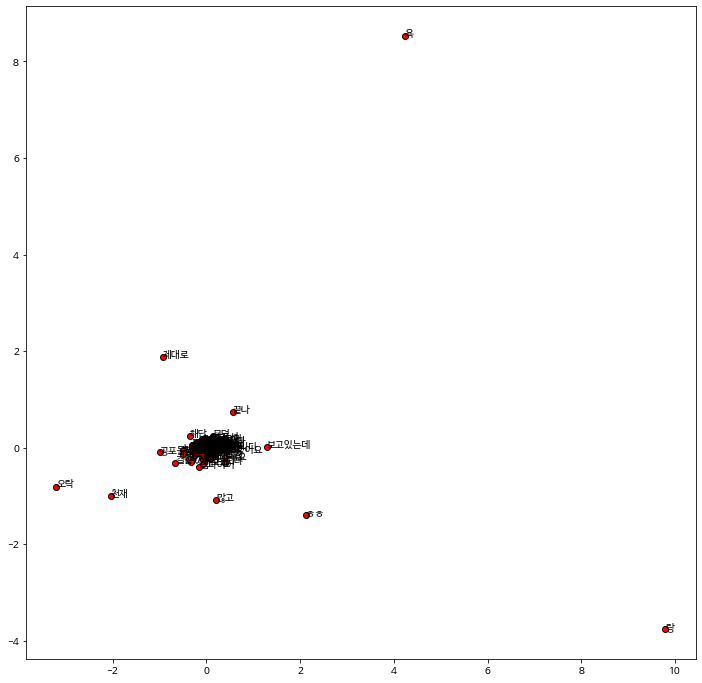

In [43]:
display_pca_scatterplot(word2vec_100.wv)